<a href="https://colab.research.google.com/github/cfonderson/portfolio/blob/main/DS4A%20Capstone/extended_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS4A CAPSTONE PROJECT: EXTENDED DATA ANALYSES 
__Team Members: Cynthia Fonderson, Gabriel Briones, Solomon Berhe, Moradeke Adeniji-Somefun__

## Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import sys
import joblib
!pip install mlxtend
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression

from scipy import stats
from scipy.stats import ttest_ind

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Change view settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EDA Insights

Our exploratory data analyses revealed significant differences in the quantity of data available on different race categories. Specifically, the current data only allows for comparison between Black and White race categories across over 20 states. Therefore, before moving on to extended analyses, we need to extract the relevant data required for our analyses.

In [ ]:
# reading the full dataset
df = pd.read_csv('full_data.csv')
df.head()

,state,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
0,Alabama,American Indian or Alaska Native,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN
1,Alabama,Asian or Pacific Islander,NaN,NaN,NaN,14966,1241,1492,222,5382,30357,16860,0,0,7407,11827,9618,6117,261,44508.0,82042.5,41543.33,21321,4844,2756,7.80,8.72,16.08,14.90
2,Alabama,Black or African American,124.0,1.5,1.6,146082,52971,78583,25347,262990,709623,170979,5364,14404,689218,3093,3307,167061,16471,30560.0,41421.2,36678.00,354857,296495,73927,7.54,9.22,38.98,50.12
3,Alabama,White,137.0,0.7,0.8,745617,159696,188400,27845,298651,2077282,647510,26329,10057,1657752,15132,20418,334003,16387,38105.4,69768.2,46528.80,1223168,575669,141658,4.80,6.70,27.80,39.08
4,Alaska,American Indian or Alaska Native,10.0,NaN,NaN,14107,2965,4743,1448,17039,50817,5813,734,1298,54243,93,0,10491,1870,41640.4,54406.6,36256.80,16935,27497,14343,11.40,16.02,29.84,36.00


In [ ]:
# selecting only black or african american records
b = df[df['race'].isin(['Black or African American'])].copy()
b.set_index('state', inplace=True)

# dropping rows with nan values
b.dropna(subset=['deaths','crude_rate','age_adj_rate'], inplace=True, how='any')

# checks
print(b.shape)
b.head()

(27, 28)


,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,Black or African American,124.0,1.5,1.6,146082,52971,78583,25347,262990,709623,170979,5364,14404,689218,3093,3307,167061,16471,30560.0,41421.2,36678.0,354857,296495,73927,7.54,9.22,38.98,50.12
Arizona,Black or African American,33.0,1.3,1.3,35056,6773,18201,3833,55827,176647,51117,2117,2444,137551,8739,7737,45483,4537,36865.8,54500.8,43435.4,90024,65730,14892,9.94,12.88,27.38,34.32
Arkansas,Black or African American,47.0,1.6,1.6,49710,17972,27645,8940,88006,238862,51801,2006,5355,240873,808,1343,59326,5222,30200.4,37659.2,32482.8,108239,123475,19020,9.50,12.74,39.84,48.10
California,Black or African American,115.0,0.7,0.7,236572,78660,137551,33441,463659,1404151,418331,10991,15005,1056592,55847,33553,293648,31400,46278.0,62160.0,49872.0,652116,521545,65844,5.88,8.04,26.84,36.60
District of Columbia,Black or African American,21.0,1.0,1.1,24204,13725,17650,4603,85449,190552,59708,772,3359,164383,5893,4728,42891,6054,50817.6,54569.6,52198.6,81343,91958,6566,6.56,10.63,30.84,40.24


In [ ]:
# selecting only white records
w = df[df['race'].isin(['White'])].copy()
w.set_index('state', inplace=True)

# dropping rows with nan values
w.dropna(subset=['deaths','crude_rate','age_adj_rate'], inplace=True, how='any')

# checks
print(w.shape)
w.head()

(43, 28)


,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,White,137.0,0.7,0.8,745617,159696,188400,27845,298651,2077282,647510,26329,10057,1657752,15132,20418,334003,16387,38105.4,69768.2,46528.8,1223168,575669,141658,4.80,6.70,27.80,39.08
Arizona,White,176.0,0.5,0.6,1092101,204954,330306,39614,612577,3404464,1152408,41115,21366,2448537,133889,167463,607054,33486,40699.6,70414.4,51233.0,1805027,1083723,258319,5.44,8.24,24.10,33.34
Arkansas,White,82.0,0.6,0.7,500297,108845,141429,20949,198482,1430245,401063,19177,8927,1136047,10976,20572,249571,10875,35755.6,61881.0,40588.2,750489,489747,89984,5.52,8.22,28.86,38.90
California,White,472.0,0.3,0.3,4482663,812554,1197462,217759,3007361,14072039,5589166,181420,78883,9554341,1100585,1096427,2851607,174452,49348.8,87402.0,60181.6,7813321,4585366,836177,4.98,7.34,21.68,31.48
Colorado,White,118.0,0.4,0.4,997546,130785,261136,28310,522528,3074446,1422661,42633,12519,2187316,69207,88105,720353,28646,46318.8,88699.2,61432.6,1723614,755711,172128,3.14,4.36,20.18,27.78


In [ ]:
# selecting common state records
b2 = b[b.index.isin(w.index)]
w2 = w[w.index.isin(b.index)]

# checking dfs shape
print(b2.shape,w2.shape)

(26, 28) (26, 28)


In [ ]:
# checking that the states are the same in both datasets
b2.index == w2.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
# concatenating the dfs
new_df = pd.concat([b2,w2]).sort_values(by=['state','race'],
                                        ascending=[True, True]).reset_index()
new_df.head()

,state,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
0,Alabama,Black or African American,124.0,1.5,1.6,146082,52971,78583,25347,262990,709623,170979,5364,14404,689218,3093,3307,167061,16471,30560.0,41421.2,36678.0,354857,296495,73927,7.54,9.22,38.98,50.12
1,Alabama,White,137.0,0.7,0.8,745617,159696,188400,27845,298651,2077282,647510,26329,10057,1657752,15132,20418,334003,16387,38105.4,69768.2,46528.8,1223168,575669,141658,4.80,6.70,27.80,39.08
2,Arizona,Black or African American,33.0,1.3,1.3,35056,6773,18201,3833,55827,176647,51117,2117,2444,137551,8739,7737,45483,4537,36865.8,54500.8,43435.4,90024,65730,14892,9.94,12.88,27.38,34.32
3,Arizona,White,176.0,0.5,0.6,1092101,204954,330306,39614,612577,3404464,1152408,41115,21366,2448537,133889,167463,607054,33486,40699.6,70414.4,51233.0,1805027,1083723,258319,5.44,8.24,24.10,33.34
4,Arkansas,Black or African American,47.0,1.6,1.6,49710,17972,27645,8940,88006,238862,51801,2006,5355,240873,808,1343,59326,5222,30200.4,37659.2,32482.8,108239,123475,19020,9.50,12.74,39.84,48.10


In [ ]:
# saving the data
new_df.to_csv('bw_data.csv', index=False)

## Quick exploratory data analysis on the new dataset

In [ ]:
df = pd.read_csv('bw_data.csv')
df.head()

,state,race,deaths,crude_rate,age_adj_rate,married,widowed,divorced,separated,never_mar,hs_diploma,higher_ed,fertile_marr,fertile_unma,us_native,foreign_cit,foreign_imm,employed,unemployed,single_inc,marr_fam_inc,unma_fam_inc,insured_priv,insured_publ,insured_none,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids
0,Alabama,Black or African American,124.0,1.5,1.6,146082,52971,78583,25347,262990,709623,170979,5364,14404,689218,3093,3307,167061,16471,30560.0,41421.2,36678.0,354857,296495,73927,7.54,9.22,38.98,50.12
1,Alabama,White,137.0,0.7,0.8,745617,159696,188400,27845,298651,2077282,647510,26329,10057,1657752,15132,20418,334003,16387,38105.4,69768.2,46528.8,1223168,575669,141658,4.80,6.70,27.80,39.08
2,Arizona,Black or African American,33.0,1.3,1.3,35056,6773,18201,3833,55827,176647,51117,2117,2444,137551,8739,7737,45483,4537,36865.8,54500.8,43435.4,90024,65730,14892,9.94,12.88,27.38,34.32
3,Arizona,White,176.0,0.5,0.6,1092101,204954,330306,39614,612577,3404464,1152408,41115,21366,2448537,133889,167463,607054,33486,40699.6,70414.4,51233.0,1805027,1083723,258319,5.44,8.24,24.10,33.34
4,Arkansas,Black or African American,47.0,1.6,1.6,49710,17972,27645,8940,88006,238862,51801,2006,5355,240873,808,1343,59326,5222,30200.4,37659.2,32482.8,108239,123475,19020,9.50,12.74,39.84,48.10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              52 non-null     object 
 1   race               52 non-null     object 
 2   deaths             52 non-null     float64
 3   crude_rate         52 non-null     float64
 4   age_adj_rate       52 non-null     float64
 5   married            52 non-null     int64  
 6   widowed            52 non-null     int64  
 7   divorced           52 non-null     int64  
 8   separated          52 non-null     int64  
 9   never_mar          52 non-null     int64  
 10  hs_diploma         52 non-null     int64  
 11  higher_ed          52 non-null     int64  
 12  fertile_marr       52 non-null     int64  
 13  fertile_unma       52 non-null     int64  
 14  us_native          52 non-null     int64  
 15  foreign_cit        52 non-null     int64  
 16  foreign_imm        52 non-nu

In [ ]:
df.isnull().sum()

state                0
race                 0
deaths               0
crude_rate           0
age_adj_rate         0
married              0
widowed              0
divorced             0
separated            0
never_mar            0
hs_diploma           0
higher_ed            0
fertile_marr         0
fertile_unma         0
us_native            0
foreign_cit          0
foreign_imm          0
employed             0
unemployed           0
single_inc           0
marr_fam_inc         0
unma_fam_inc         0
insured_priv         0
insured_publ         0
insured_none         0
poverty_marr         0
poverty_marr_kids    0
poverty_unma         0
poverty_unma_kids    0
dtype: int64

In [ ]:
# calculating population percentages across states
df1 = df.copy()

ms_pop = df1['married'] + df1['widowed'] + df1['divorced'] + df1['separated'] + df1['never_mar'] 
ed_pop = df1['hs_diploma'] + df1['higher_ed'] 
fe_pop = df1['fertile_marr'] + df1['fertile_unma']
ci_pop = df1['us_native'] + df1['foreign_cit'] + df1['foreign_imm']
em_pop = df1['employed'] + df1['unemployed']
hi_pop = df1['insured_priv'] + df1['insured_publ'] + df1['insured_none']

df1['married_per'] = (df1['married']/ms_pop)*100
df1['widowed_per'] = (df1['widowed']/ms_pop)*100
df1['divorced_per'] = (df1['divorced']/ms_pop)*100
df1['separated_per'] = (df1['separated']/ms_pop)*100
df1['never_mar_per'] = (df1['never_mar']/ms_pop)*100
df1['hs_diploma_per'] = (df1['hs_diploma']/ed_pop)*100
df1['higher_ed_per'] = (df1['higher_ed']/ed_pop)*100
df1['fertile_marr_per'] = (df1['fertile_marr']/fe_pop)*100
df1['fertile_unma_per'] = (df1['fertile_unma']/fe_pop)*100
df1['us_native_per'] = (df1['us_native']/ci_pop)*100
df1['foreign_cit_per'] = (df1['foreign_cit']/ci_pop)*100
df1['foreign_imm_per'] = (df1['foreign_imm']/ci_pop)*100
df1['employed_per'] = (df1['employed']/em_pop)*100
df1['unemployed_per'] = (df1['unemployed']/em_pop)*100
df1['insured_priv_per'] = (df1['insured_priv']/hi_pop)*100
df1['insured_publ_per'] = (df1['insured_publ']/hi_pop)*100
df1['insured_none_per'] = (df1['insured_none']/hi_pop)*100

df1.drop(['deaths','crude_rate',
          'married','widowed','divorced','separated','never_mar',
          'hs_diploma','higher_ed',
          'fertile_marr','fertile_unma',
          'us_native','foreign_cit','foreign_imm',
          'employed','unemployed',
          'insured_priv','insured_publ','insured_none'],
         axis=1, 
         inplace=True)
df1.head()

,state,race,age_adj_rate,single_inc,marr_fam_inc,unma_fam_inc,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids,married_per,widowed_per,divorced_per,separated_per,never_mar_per,hs_diploma_per,higher_ed_per,fertile_marr_per,fertile_unma_per,us_native_per,foreign_cit_per,foreign_imm_per,employed_per,unemployed_per,insured_priv_per,insured_publ_per,insured_none_per
0,Alabama,Black or African American,1.6,30560.0,41421.2,36678.0,7.54,9.22,38.98,50.12,25.810772,9.359280,13.884585,4.478482,46.466881,80.583851,19.416149,27.134763,72.865237,99.079955,0.444641,0.475405,91.025543,8.974457,48.926965,40.880130,10.192905
1,Alabama,White,0.8,38105.4,69768.2,46528.8,4.80,6.70,27.80,39.08,52.500512,11.244542,13.265653,1.960627,21.028665,76.236351,23.763649,72.360248,27.639752,97.900552,0.893639,1.205810,95.323211,4.676789,63.033814,29.666090,7.300096
2,Arizona,Black or African American,1.3,36865.8,54500.8,43435.4,9.94,12.88,27.38,34.32,29.288997,5.658785,15.206784,3.202440,46.642994,77.557033,22.442967,46.415260,53.584740,89.303174,5.673681,5.023145,90.929628,9.070372,52.754826,38.518336,8.726838
3,Arizona,White,0.6,40699.6,70414.4,51233.0,5.44,8.24,24.10,33.34,47.908580,8.990977,14.489952,1.737798,26.872693,74.710547,25.289453,65.804004,34.195996,89.041303,4.868887,6.089809,94.772223,5.227777,57.355813,34.435947,8.208241
4,Arkansas,Black or African American,1.6,30200.4,37659.2,32482.8,9.50,12.74,39.84,48.10,25.853864,9.347126,14.377994,4.649639,45.771377,82.178330,17.821670,27.251732,72.748268,99.114902,0.332477,0.552620,91.909897,8.090103,43.168856,49.245415,7.585728


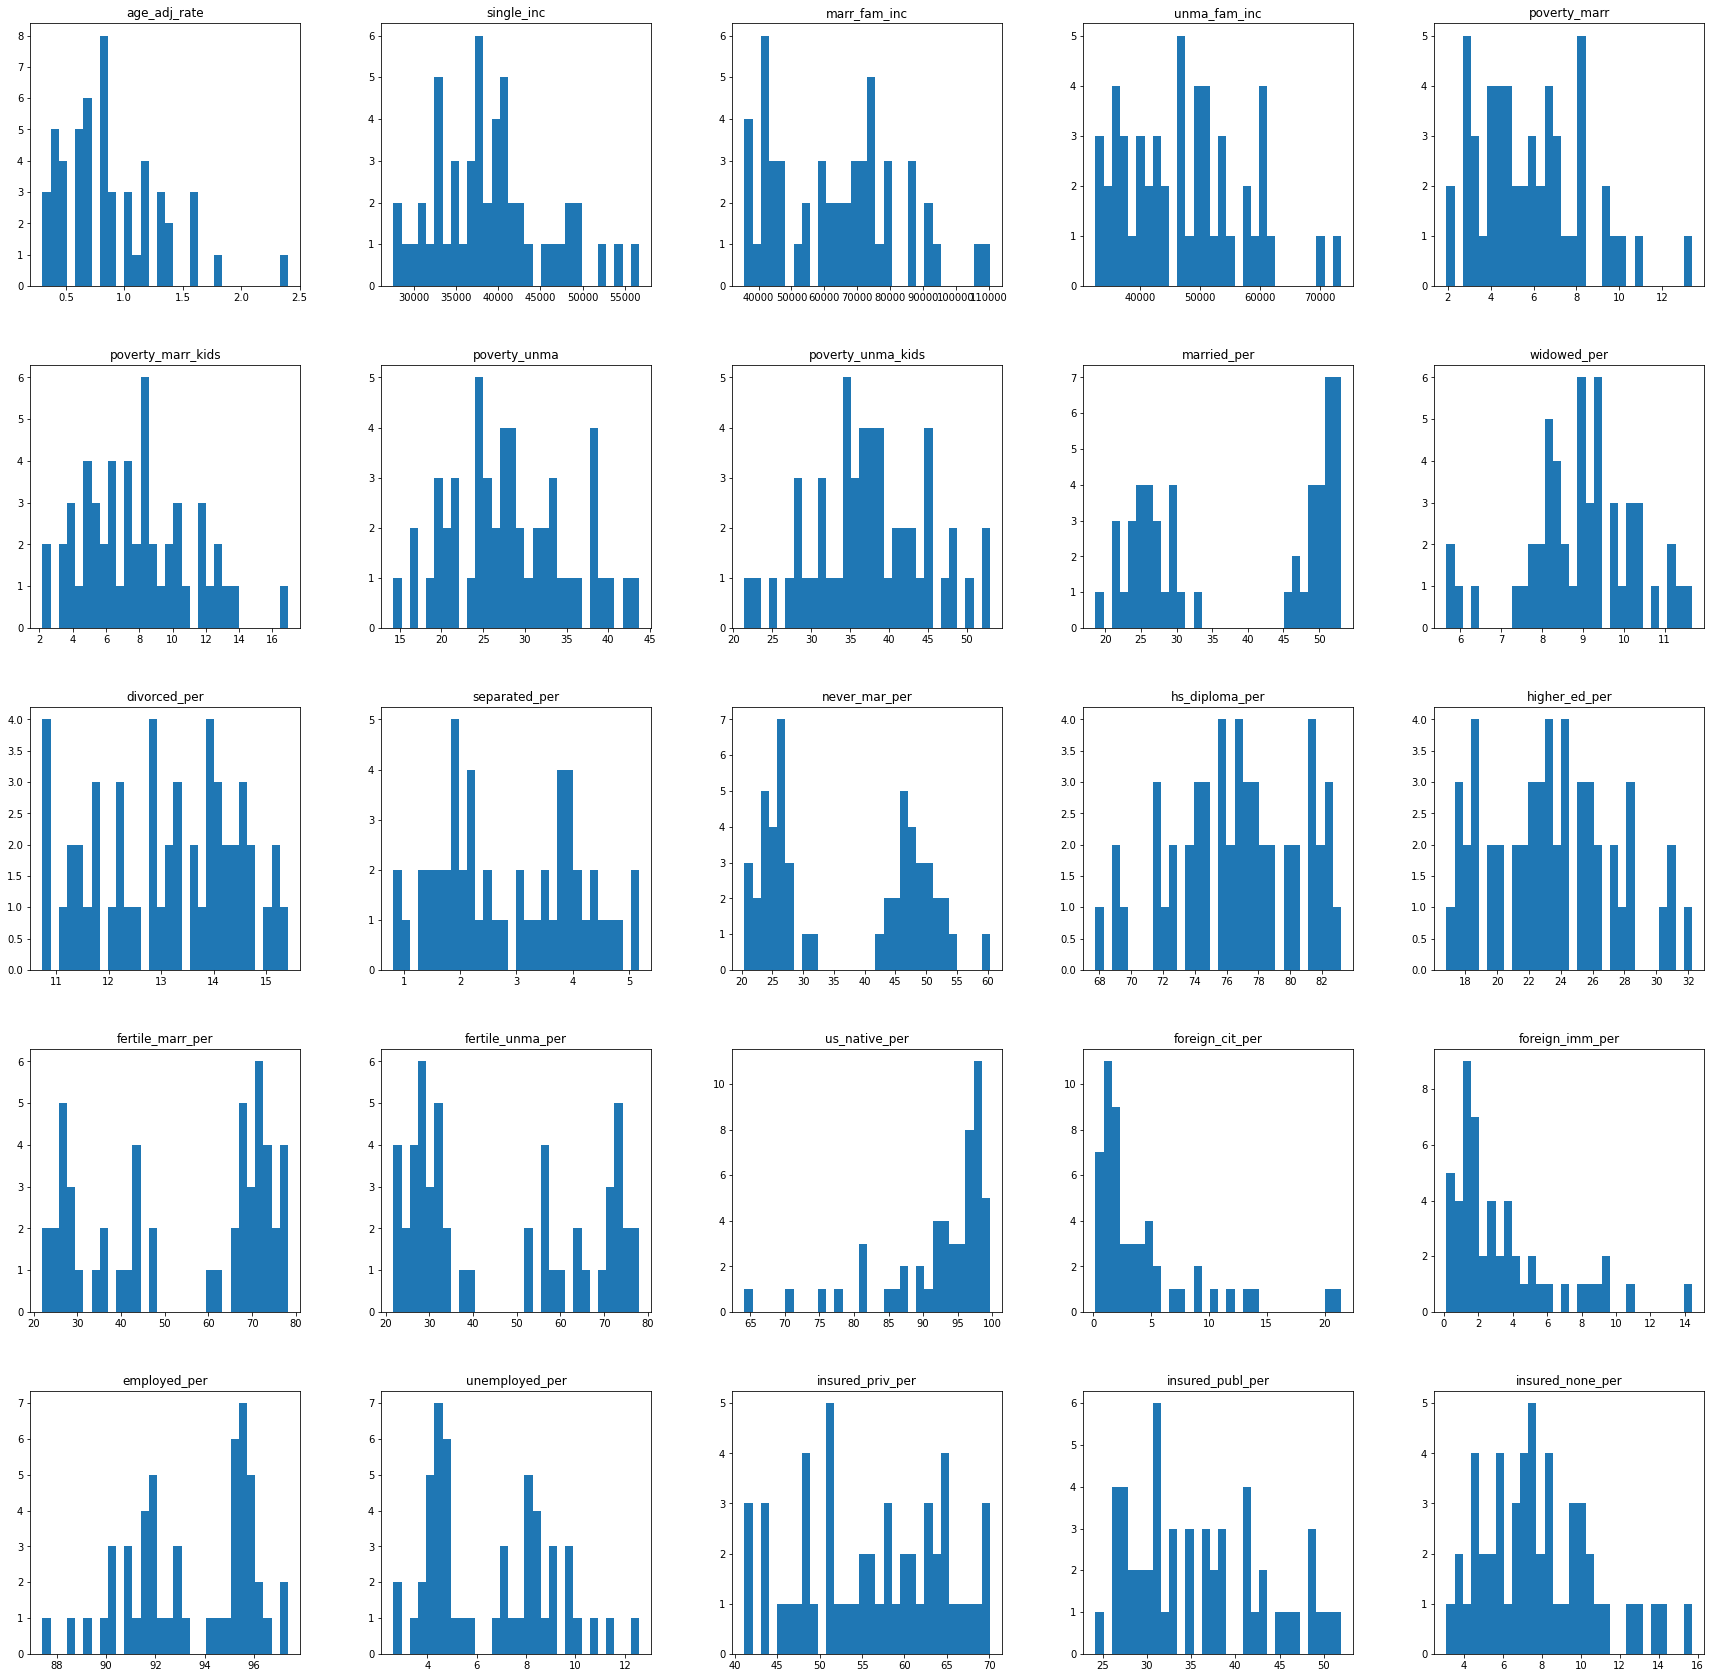

In [ ]:
# checking the distribution of our dataset
df1.hist(figsize=(30,30), bins=30, grid=False);

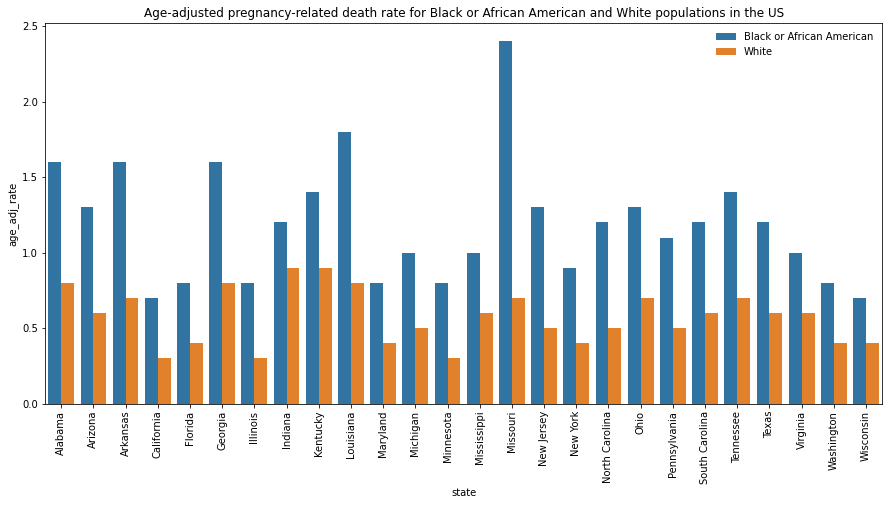

In [ ]:
# differences in death rate between black and white population
plt.figure(figsize=(15,7))
sns.barplot(data=df1, 
            x='state', 
            y='age_adj_rate',
            hue='race')

plt.xticks(rotation=90)
plt.title('Age-adjusted pregnancy-related death rate for Black or African American and White populations in the US')
plt.legend(frameon=False)
plt.show()

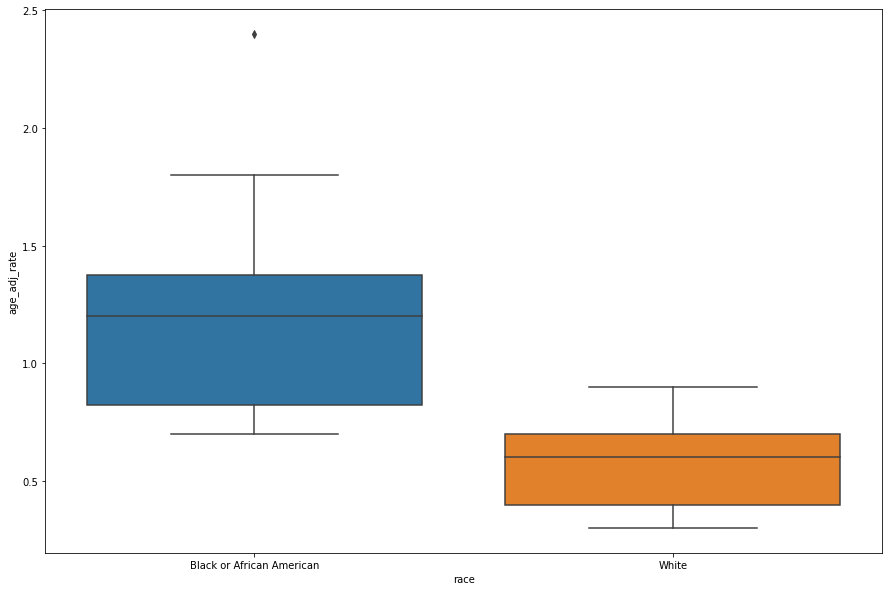

In [ ]:
# differences in death rate between black and white population
plt.figure(figsize=(15,10))
sns.boxplot(data=df1, 
            x='race', 
            y='age_adj_rate')
plt.show()

### Data Preparation

There are few data points in our dataset (52), so prior to conducting a regression analysis, we decided to artificially enhance the records (via bootstrapping). 

We also decided to standardize the records to prevent variables with larger magnitudes from influencing our results

In [ ]:
df1.head()

,state,race,age_adj_rate,single_inc,marr_fam_inc,unma_fam_inc,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids,married_per,widowed_per,divorced_per,separated_per,never_mar_per,hs_diploma_per,higher_ed_per,fertile_marr_per,fertile_unma_per,us_native_per,foreign_cit_per,foreign_imm_per,employed_per,unemployed_per,insured_priv_per,insured_publ_per,insured_none_per
0,Alabama,Black or African American,1.6,30560.0,41421.2,36678.0,7.54,9.22,38.98,50.12,25.810772,9.359280,13.884585,4.478482,46.466881,80.583851,19.416149,27.134763,72.865237,99.079955,0.444641,0.475405,91.025543,8.974457,48.926965,40.880130,10.192905
1,Alabama,White,0.8,38105.4,69768.2,46528.8,4.80,6.70,27.80,39.08,52.500512,11.244542,13.265653,1.960627,21.028665,76.236351,23.763649,72.360248,27.639752,97.900552,0.893639,1.205810,95.323211,4.676789,63.033814,29.666090,7.300096
2,Arizona,Black or African American,1.3,36865.8,54500.8,43435.4,9.94,12.88,27.38,34.32,29.288997,5.658785,15.206784,3.202440,46.642994,77.557033,22.442967,46.415260,53.584740,89.303174,5.673681,5.023145,90.929628,9.070372,52.754826,38.518336,8.726838
3,Arizona,White,0.6,40699.6,70414.4,51233.0,5.44,8.24,24.10,33.34,47.908580,8.990977,14.489952,1.737798,26.872693,74.710547,25.289453,65.804004,34.195996,89.041303,4.868887,6.089809,94.772223,5.227777,57.355813,34.435947,8.208241
4,Arkansas,Black or African American,1.6,30200.4,37659.2,32482.8,9.50,12.74,39.84,48.10,25.853864,9.347126,14.377994,4.649639,45.771377,82.178330,17.821670,27.251732,72.748268,99.114902,0.332477,0.552620,91.909897,8.090103,43.168856,49.245415,7.585728


In [ ]:
# standardizing the numerical data
def standardize(col):
    return (col - col.mean()) / (col.std())

df_num = df1.iloc[:, 2:].apply(standardize)
df_num.head()

,age_adj_rate,single_inc,marr_fam_inc,unma_fam_inc,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids,married_per,widowed_per,divorced_per,separated_per,never_mar_per,hs_diploma_per,higher_ed_per,fertile_marr_per,fertile_unma_per,us_native_per,foreign_cit_per,foreign_imm_per,employed_per,unemployed_per,insured_priv_per,insured_publ_per,insured_none_per
0,1.652523,-1.288747,-1.163915,-1.063479,0.679658,0.417806,1.523165,1.751130,-0.964049,0.308174,0.593816,1.339221,0.774871,1.023971,-1.023971,-1.326282,1.326282,0.878251,-0.795463,-0.962897,-0.976839,0.976839,-0.874590,0.647955,0.828771
1,-0.185577,-0.158748,0.330497,-0.066133,-0.432141,-0.362766,-0.077246,0.220358,1.128497,1.708313,0.129669,-0.775750,-1.301098,-0.088355,0.088355,0.930041,-0.930041,0.724500,-0.700658,-0.726063,0.766373,-0.766373,0.812291,-0.820901,-0.184070
2,0.963235,-0.344390,-0.474378,-0.379325,1.653497,1.551495,-0.137368,-0.439649,-0.691347,-2.440096,1.585357,0.267359,0.789244,0.249547,-0.249547,-0.364368,0.364368,-0.396285,0.308637,0.511709,-1.015744,1.015744,-0.416858,0.338599,0.315466
3,-0.645103,0.229759,0.364563,0.410144,-0.172451,0.114250,-0.606898,-0.575533,0.768477,0.034644,1.047792,-0.962924,-0.824177,-0.478738,0.478738,0.602947,-0.602947,-0.430423,0.138707,0.857575,0.542882,-0.542882,0.133322,-0.196128,0.133893
4,1.652523,-1.342600,-1.362242,-1.488222,1.474960,1.508130,1.646273,1.471043,-0.960670,0.299147,0.963832,1.482991,0.718112,1.431925,-1.431925,-1.320446,1.320446,0.882807,-0.819146,-0.937860,-0.618129,0.618129,-1.563137,1.743671,-0.084064


In [ ]:
# label encoding state and race column
df_cat = df1.iloc[:,:2]

df_cat['state'] = df_cat['state'].astype('category')
df_cat['state_cat'] = df_cat['state'].cat.codes

df_cat['race'] = df_cat['race'].astype('category')
df_cat['race_cat'] = df_cat['race'].cat.codes

df_cat.head()

,state,race,state_cat,race_cat
0,Alabama,Black or African American,0,0
1,Alabama,White,0,1
2,Arizona,Black or African American,1,0
3,Arizona,White,1,1
4,Arkansas,Black or African American,2,0


In [ ]:
# concatenating the data
df2 = pd.concat([df_cat.iloc[:,2:], df_num], axis=1)
df2.head()

,state_cat,race_cat,age_adj_rate,single_inc,marr_fam_inc,unma_fam_inc,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids,married_per,widowed_per,divorced_per,separated_per,never_mar_per,hs_diploma_per,higher_ed_per,fertile_marr_per,fertile_unma_per,us_native_per,foreign_cit_per,foreign_imm_per,employed_per,unemployed_per,insured_priv_per,insured_publ_per,insured_none_per
0,0,0,1.652523,-1.288747,-1.163915,-1.063479,0.679658,0.417806,1.523165,1.751130,-0.964049,0.308174,0.593816,1.339221,0.774871,1.023971,-1.023971,-1.326282,1.326282,0.878251,-0.795463,-0.962897,-0.976839,0.976839,-0.874590,0.647955,0.828771
1,0,1,-0.185577,-0.158748,0.330497,-0.066133,-0.432141,-0.362766,-0.077246,0.220358,1.128497,1.708313,0.129669,-0.775750,-1.301098,-0.088355,0.088355,0.930041,-0.930041,0.724500,-0.700658,-0.726063,0.766373,-0.766373,0.812291,-0.820901,-0.184070
2,1,0,0.963235,-0.344390,-0.474378,-0.379325,1.653497,1.551495,-0.137368,-0.439649,-0.691347,-2.440096,1.585357,0.267359,0.789244,0.249547,-0.249547,-0.364368,0.364368,-0.396285,0.308637,0.511709,-1.015744,1.015744,-0.416858,0.338599,0.315466
3,1,1,-0.645103,0.229759,0.364563,0.410144,-0.172451,0.114250,-0.606898,-0.575533,0.768477,0.034644,1.047792,-0.962924,-0.824177,-0.478738,0.478738,0.602947,-0.602947,-0.430423,0.138707,0.857575,0.542882,-0.542882,0.133322,-0.196128,0.133893
4,2,0,1.652523,-1.342600,-1.362242,-1.488222,1.474960,1.508130,1.646273,1.471043,-0.960670,0.299147,0.963832,1.482991,0.718112,1.431925,-1.431925,-1.320446,1.320446,0.882807,-0.819146,-0.937860,-0.618129,0.618129,-1.563137,1.743671,-0.084064


In [ ]:
# bootstrapping the dataset to have ~150 data points
n = len(df2) * 3
df2 = df2.sample(n, replace=True, random_state=1).reset_index(drop=True)
df2.shape

(156, 27)

In [ ]:
df2.head()

,state_cat,race_cat,age_adj_rate,single_inc,marr_fam_inc,unma_fam_inc,poverty_marr,poverty_marr_kids,poverty_unma,poverty_unma_kids,married_per,widowed_per,divorced_per,separated_per,never_mar_per,hs_diploma_per,higher_ed_per,fertile_marr_per,fertile_unma_per,us_native_per,foreign_cit_per,foreign_imm_per,employed_per,unemployed_per,insured_priv_per,insured_publ_per,insured_none_per
0,18,1,-0.415340,0.245933,0.548941,0.372907,-0.975868,-0.938903,-0.372133,-0.212252,0.891688,0.680106,0.125345,-1.129089,-0.906824,-0.220135,0.220135,0.693413,-0.693413,0.700423,-0.592079,-0.832917,1.022708,-1.022708,0.946935,-0.679903,-0.955200
1,21,1,-0.415340,-0.195110,0.204067,-0.304424,-0.318526,-0.133550,-0.097287,0.059516,1.060615,0.840784,0.451065,-0.777358,-1.169932,-0.182245,0.182245,0.894615,-0.894615,0.582642,-0.619131,-0.498420,0.795556,-0.795556,0.514041,-0.579153,0.042997
2,6,0,-0.185577,0.032346,-0.859255,-0.614031,0.355045,0.349661,0.721528,0.647421,-1.308530,0.086813,-0.204981,0.467076,1.329421,0.534844,-0.534844,-1.373369,1.373369,0.492017,-0.439571,-0.548753,-2.435596,2.435596,-1.167108,1.347364,-0.184287
3,4,0,-0.185577,-1.159624,-0.880954,-0.763510,0.923118,0.770923,0.154656,0.076155,-0.810994,-1.131801,0.633288,0.813545,0.820564,0.790425,-0.790425,-0.701376,0.701376,-1.882243,1.992884,1.621277,-0.736774,0.736774,-0.892845,0.128815,2.269900
4,4,1,-1.104628,-0.058469,0.282481,0.233532,-0.277950,-0.189306,-0.947594,-0.852846,0.686337,1.768639,1.590220,-0.574992,-1.025935,-0.495079,0.495079,0.589511,-0.589511,-1.427979,1.381246,1.430661,0.677733,-0.677733,0.030207,-0.390325,0.954907


### T-tests

In [ ]:
# defining the categories
grp1 = df2[df2['race_cat']== 0]         # Black or African American
grp2 = df2[df2['race_cat']== 1]         # White

# performing independent two-sample t-test
test1 = ttest_ind(grp1['age_adj_rate'], grp2['age_adj_rate'])

# performing Welch's t-test
test2 = ttest_ind(grp1['age_adj_rate'], grp2['age_adj_rate'], equal_var=False)

print(f"The p-value for the independent two sample t-test is {test1[1]}")
print(f"The p-value for Welch's t-test is {test2[1]}")

The p-value for the independent two sample t-test is 1.1585804434173799e-24
The p-value for Welch's t-test is 4.397988160106954e-21


The p-values for the independent two-sample t-test and Welch's t-test are less than 0.05. Therefore, we reject the null hypotheses of the t-tests and conclude that there is sufficient evidence to affirm that the pregnancy-related death rates differ between black and white women in the United States.

### Correlation

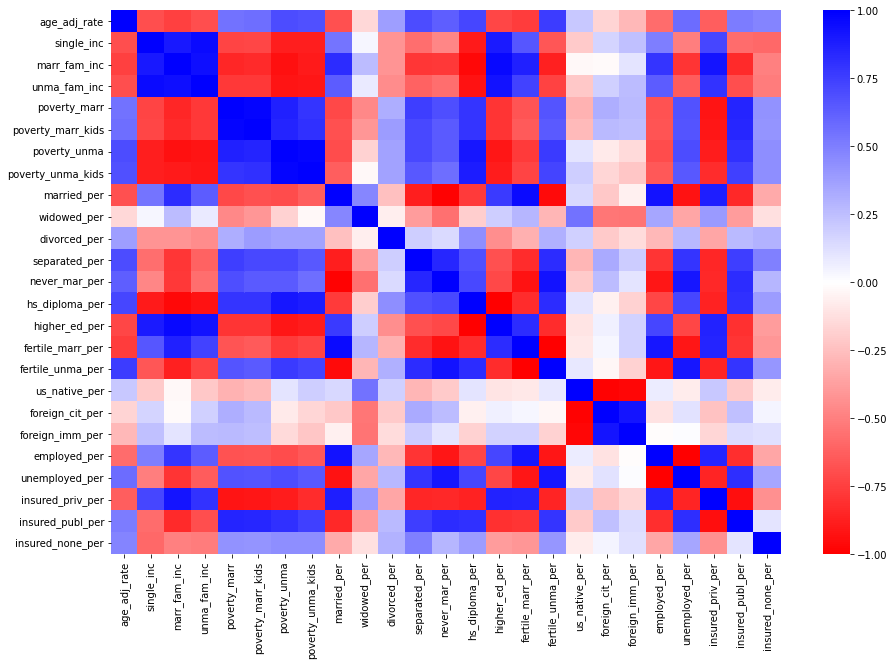

In [ ]:
# calculating the correlation matrix
corr = df2.iloc[:,2:].corr()

# plotting the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='bwr_r')
plt.show()

In [ ]:
# correlation to the age-adjusted mortality rate
corr2 = corr['age_adj_rate'].to_frame().reset_index()
corr2

,index,age_adj_rate
0,age_adj_rate,1.000000
1,single_inc,-0.693694
2,marr_fam_inc,-0.746360
3,unma_fam_inc,-0.692864
4,poverty_marr,0.548888
5,poverty_marr_kids,0.564288
6,poverty_unma,0.698338
7,poverty_unma_kids,0.687209
8,married_per,-0.685373
9,widowed_per,-0.149864


In [ ]:
# positive correlations to the age-adjusted mortality rate 
pos_cor = corr2[corr2['age_adj_rate'] > 0]
pos_cor

,index,age_adj_rate
0,age_adj_rate,1.000000
4,poverty_marr,0.548888
5,poverty_marr_kids,0.564288
6,poverty_unma,0.698338
7,poverty_unma_kids,0.687209
10,divorced_per,0.379606
11,separated_per,0.697369
12,never_mar_per,0.628285
13,hs_diploma_per,0.720200
16,fertile_unma_per,0.765514


In [ ]:
# negative correlations to the age-adjusted mortality rate 
neg_cor = corr2[corr2['age_adj_rate'] < 0]
neg_cor

,index,age_adj_rate
1,single_inc,-0.693694
2,marr_fam_inc,-0.746360
3,unma_fam_inc,-0.692864
8,married_per,-0.685373
9,widowed_per,-0.149864
14,higher_ed_per,-0.720200
15,fertile_marr_per,-0.765514
18,foreign_cit_per,-0.164868
19,foreign_imm_per,-0.273617
20,employed_per,-0.573963


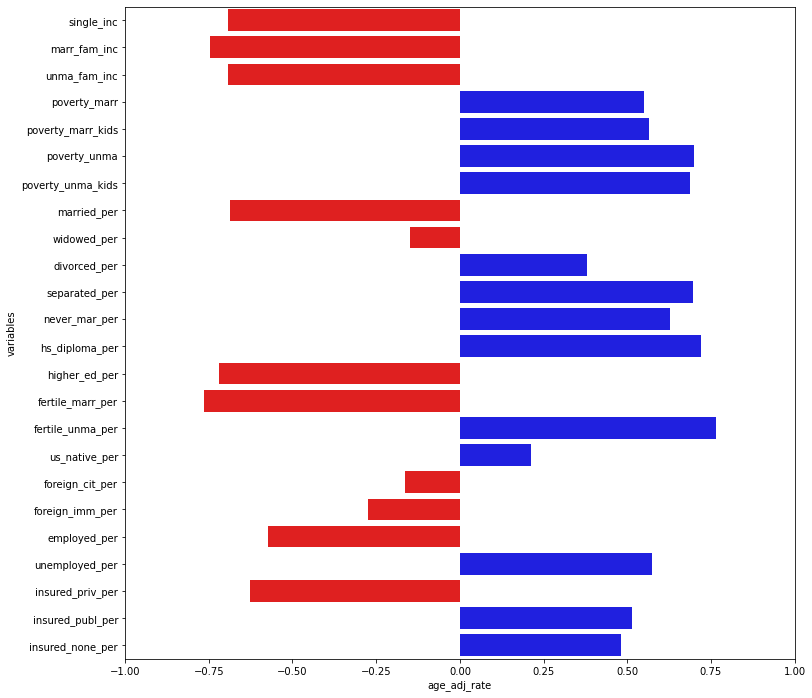

In [ ]:
# plotting correlation with age-adjusted mortality rate
plt.figure(figsize=(12,12))
sns.barplot(x=corr2['age_adj_rate'][1:], y=corr2['index'][1:],
            palette=corr2['age_adj_rate'][1:].apply(lambda x: 'b' if x > 0 else 'r'))
plt.ylabel('variables')
plt.xlim(-1,1)
plt.show()

#### Insights on correlations to pregnancy-related mortality, regardless of race

__Income:__ In general, having an income is <b>negatively</b> correlated with pregnancy-related mortality rates, regardless of the family structure. Nevertheless, families with a married fair slightly better than single women or unmarried women with children. <br>

__Poverty rates:__ Overall, poverty rates are <b>positively</b> correlated with pregnancy-related mortality rates, regardless of the family structure. Families with single parents are more likely to die of pregnancy-related issues than families with a married couple. <br>

__Marital status:__ While being <u>married</u> or <u>widowed</u> is <b>negatively</b> correlated with pregnancy-related mortality, being <u>separated</u>, <u>divorced</u> or <u>never married</u> are <b>positively</b> correlated with pregnancy-related mortality. A married woman is least at risk of dying of pregnancy-related causes, while a separated, divorced or never married woman's risk of dying of a pregnancy-related cause is the highest.<br>

__Educational attainment:__ Holding only a <u>high school diploma</u> alone is <b>positively</b> correlated with pregnancy-related mortality, but attaining a <u>higher education</u> reduces a woman's risk of dying of pregnancy-related causes, as the variable is <b>negatively</b> correlated to mortality rate.<br>

__Fertility:__ Married mothers (<b>negative</b> correlation, -0.75) are less likely to die of pregnancy-related causes than unmarried mothers (<b>positive</b> correlation, over 0.75).<br>

__Citizenship:__ <u>U.S. natives</u> (<b>positive</b> correlation) are more likely to die of pregnancy-related causes than <u>foreign-born occupants</u> (<b>negative</b> correlation), regardless of their citizenship. Immigrants fair slightly better than naturalized citizens.<br>

__Employment status:__ <u>Having a job</u> reduces a woman's risk of dying of pregnancy-related causes (<b>positive</b> correlation), while being <u>unemployed</u> increases said risk (<b>negative</b> correlation).<br>

__Access to health insurance:__ Having access to <u>private health insurance</u> is <b>negatively</b> correlated with pregnancy-related mortality, while being <u>publicly insured or uninsured</u> is <b>positively</b> correlated with mortality.<br>

In [ ]:
# calculating the correlation with age-adjusted mortality rate by race
corr3 = df2.groupby('race_cat').corr()['age_adj_rate'].to_frame().reset_index()
corr3

,race_cat,level_1,age_adj_rate
0,0,state_cat,-0.104433
1,0,age_adj_rate,1.000000
2,0,single_inc,-0.488637
3,0,marr_fam_inc,-0.356942
4,0,unma_fam_inc,-0.391146
5,0,poverty_marr,0.027080
6,0,poverty_marr_kids,0.138639
7,0,poverty_unma,0.329295
8,0,poverty_unma_kids,0.398006
9,0,married_per,-0.075842


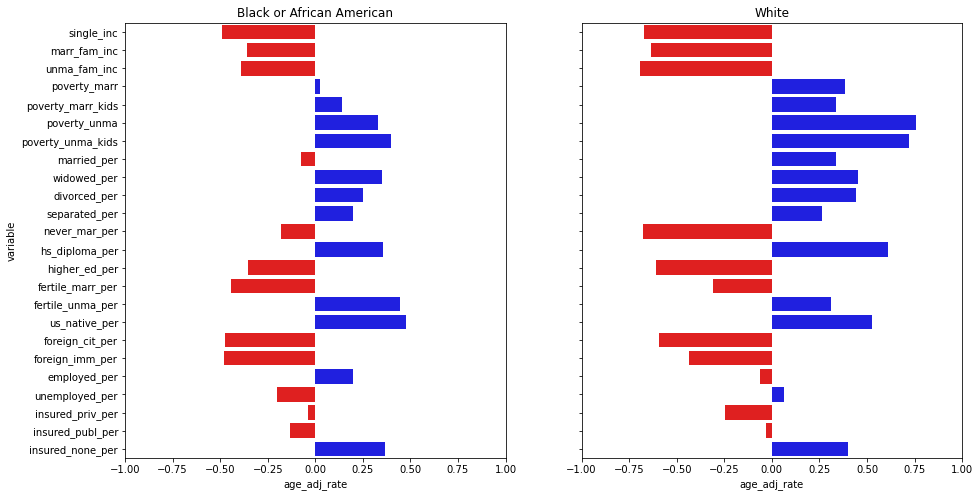

In [ ]:
# plotting correlation with age-adjusted mortality rate by race
r1 = corr3[corr3['race_cat'] == 0]
r2 = corr3[corr3['race_cat'] == 1]

fig, axs = plt.subplots(1, 2, figsize=(15,8))
sns.barplot(data=r1,x=r1['age_adj_rate'][2:],y=r1['level_1'][2:],ax=axs[0],
            palette=r1['age_adj_rate'][2:].apply(lambda x: 'b' if x>0 else 'r'),
            orient='h')

sns.barplot(data=r2,x=r2['age_adj_rate'][2:],y=r2['level_1'][2:],ax=axs[1],
            palette=r2['age_adj_rate'][2:].apply(lambda x: 'b' if x>0 else 'r'),
            orient='h')

axs[0].set(xlim=(-1, 1), ylabel='variable', 
           title='Black or African American')
axs[1].set(xlim=(-1, 1), ylabel=None, 
           yticklabels=[], title='White')

plt.show()

#### Insights on correlations to pregnancy-related mortality, by race

Overall, the trends observed in across the entire population were maintained. Nevertheless, surprising observations were also made:

- Although poverty rates are still positively correlated with pregnancy-related mortality, poverty rates in black married couples is not correlated to mortality.
- In black people, being married or never married is negatively with pregnancy-related mortality, but in the white group, marital status is positively correlated with pregnancy-related mortality regardless of the status.
- In black people, being employed is positively correlated to pregnancy-related mortality, while being unemployed is negatively correlated to mortality rates. This is the opposite of what was observed in the overall population, as well as the white population.
- In the black population, access to any type of health care insurance (private or public) is negatively correlated to pregnancy-related mortality. In the white population, only access to private health care insurance is negatively correlated to pregnancy-related mortality rates, i.e., being publicly insured or uninsured increases a white woman's risk of dying of pregnancy-related causes.

### Regression

#### Kitchen sink model (all variables)

In [ ]:
formula = 'age_adj_rate ~ state_cat + race_cat + single_inc + marr_fam_inc + unma_fam_inc +' \
           'poverty_marr + poverty_marr_kids + poverty_unma + poverty_unma_kids + married_per + ' \
           'widowed_per + divorced_per + separated_per + never_mar_per + hs_diploma_per + higher_ed_per +' \
           'fertile_marr_per + fertile_unma_per + us_native_per + foreign_cit_per + foreign_imm_per +' \
           'employed_per + unemployed_per + insured_priv_per + insured_publ_per + insured_none_per'

model = smf.ols(formula, data=df2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           age_adj_rate   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     41.46
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           9.28e-48
Time:                        21:34:40   Log-Likelihood:                -75.000
No. Observations:                 156   AIC:                             192.0
Df Residuals:                     135   BIC:                             256.0
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8082      0.33

#### Model Evaluation


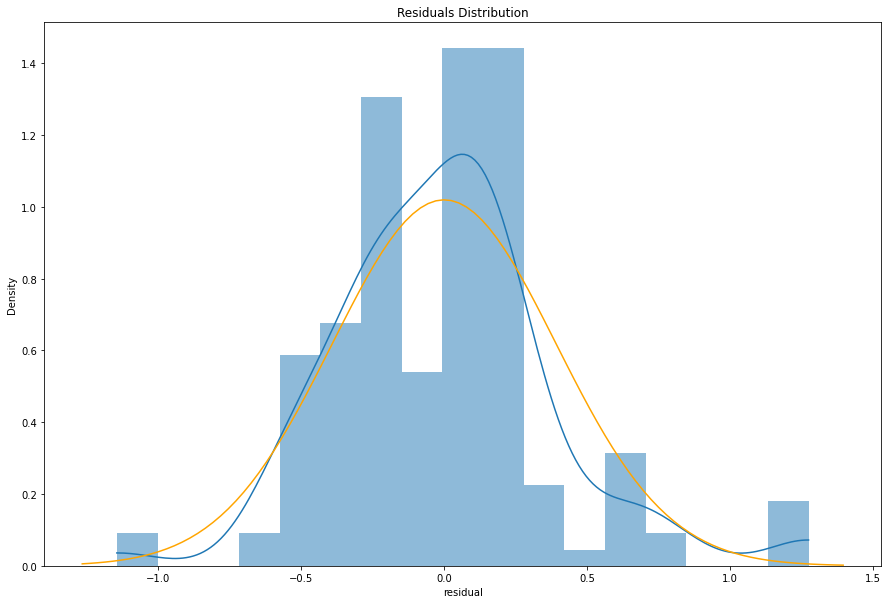

In [ ]:
avg, std = stats.norm.fit(model.resid)

# plotting the residual
fig, ax = plt.subplots(figsize=(15,10))

# plot the residuals
sns.histplot(x=model.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Residuals Distribution", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, avg, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

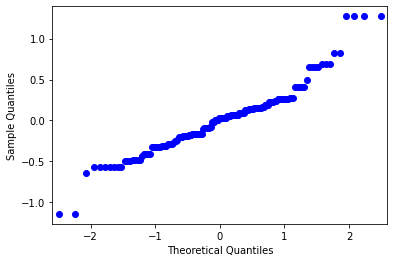

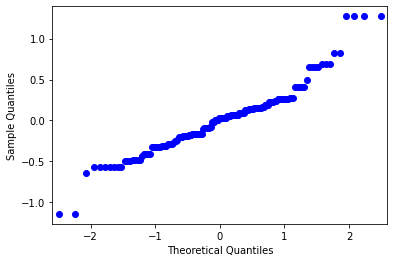

In [ ]:
sm.qqplot(model.resid)

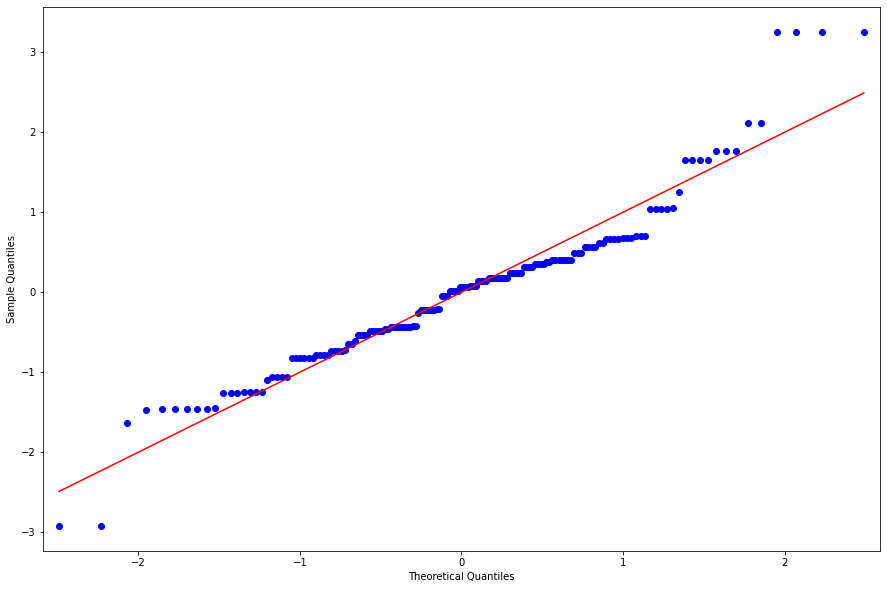

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sm.qqplot(model.resid, line='s', fit=True, ax=ax)
plt.show()

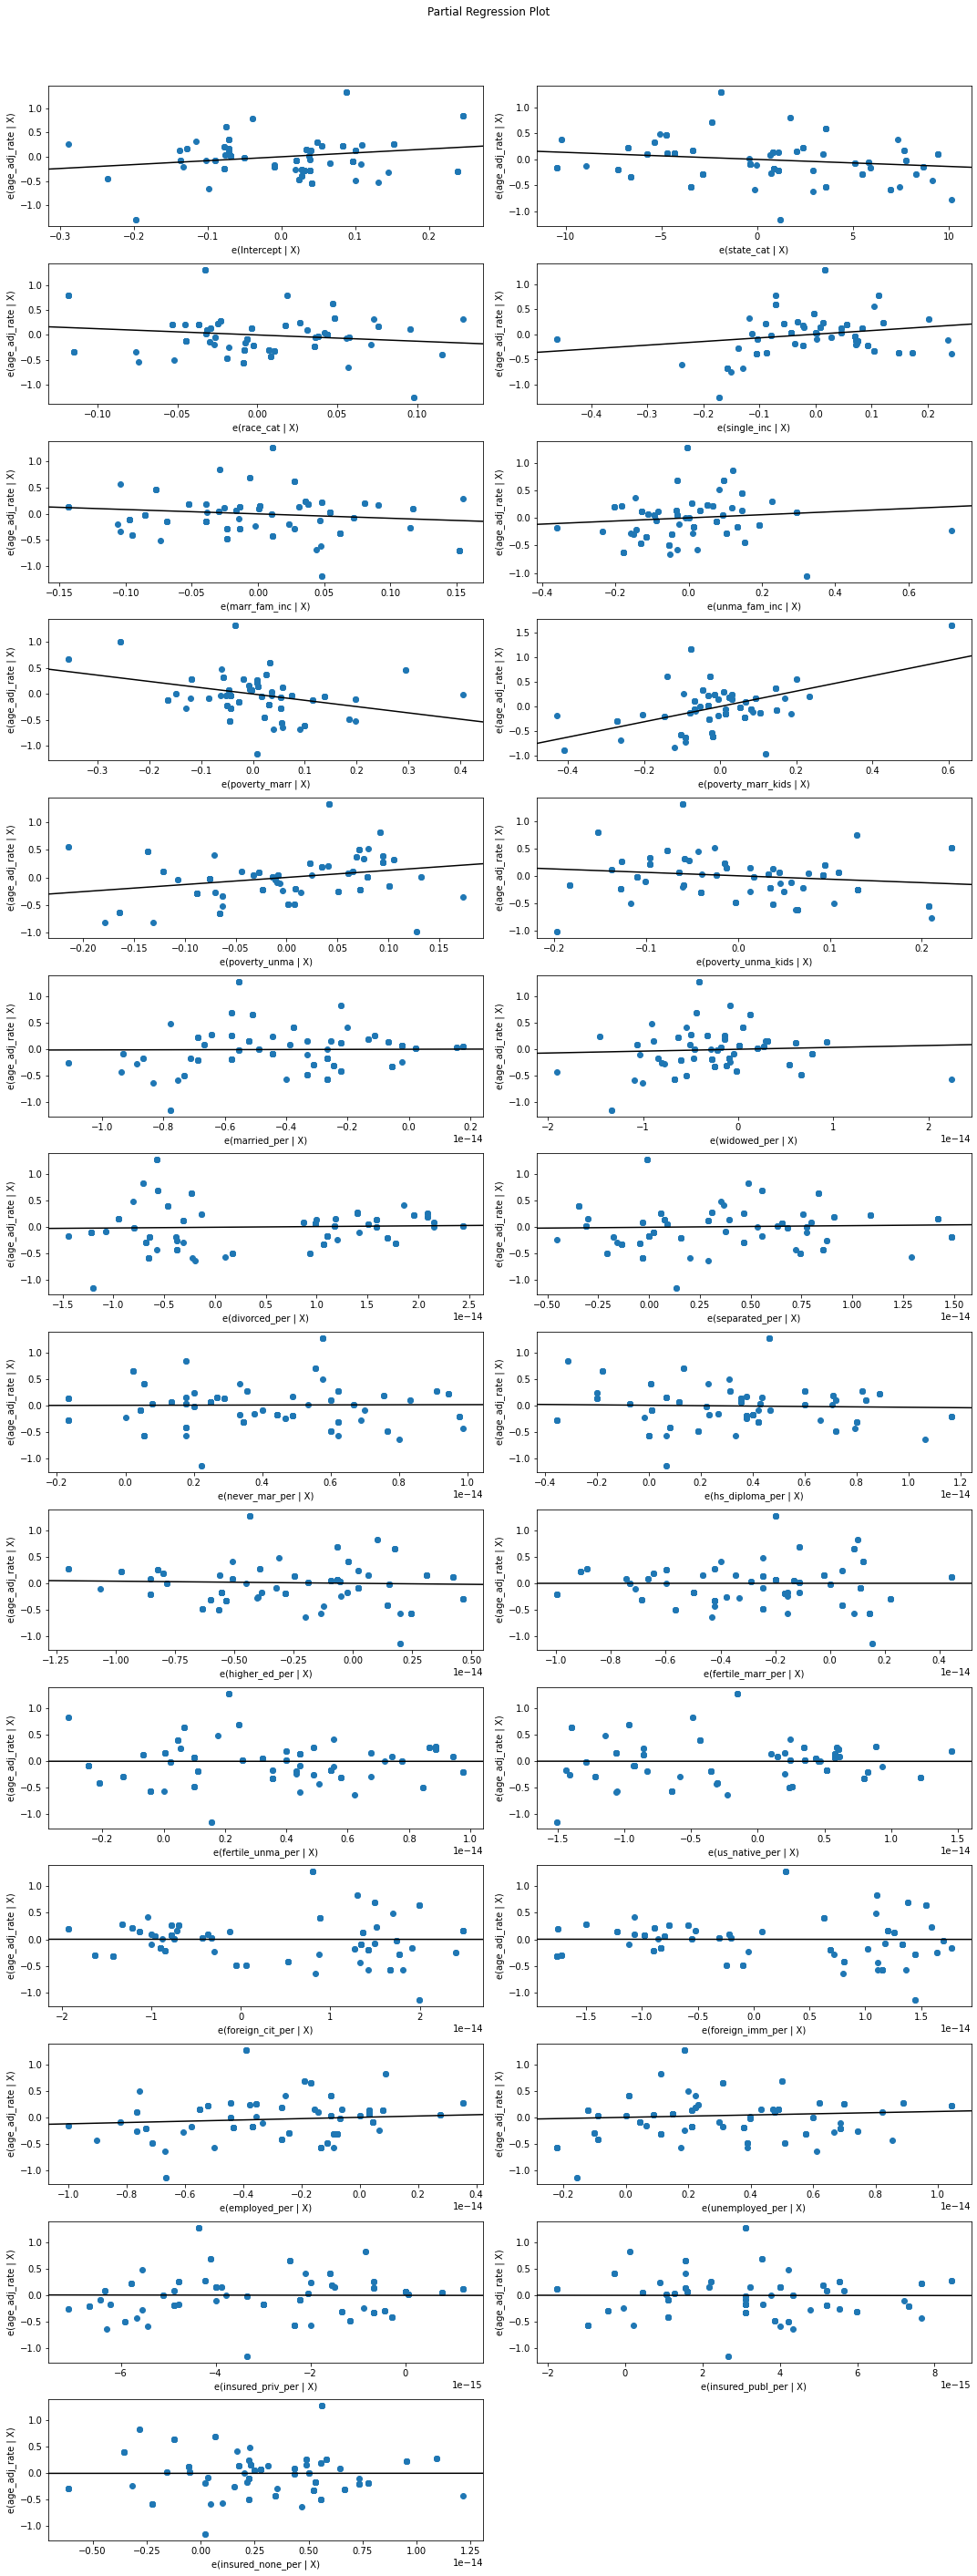

In [ ]:
# partial regression plot
fig = plt.figure(figsize=(15,40))
sm.graphics.plot_partregress_grid(model, fig=fig)
plt.show()

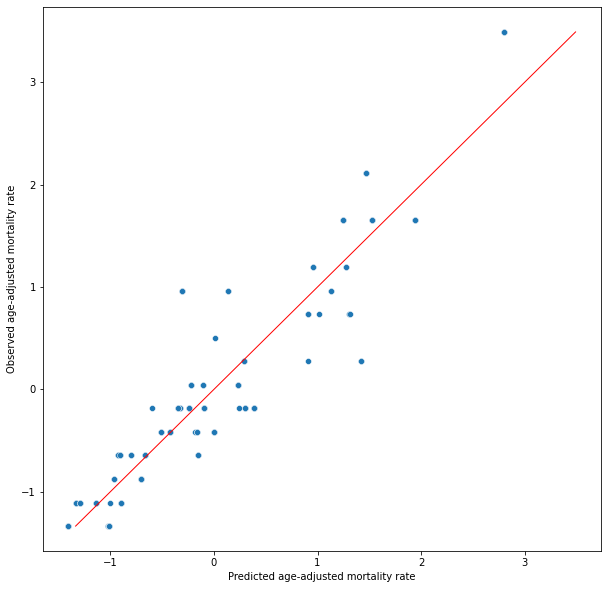

In [ ]:
Y = df2.age_adj_rate
Y_max = df2.age_adj_rate.max()
Y_min = df2.age_adj_rate.min()

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = model.fittedvalues, y=Y, ax=ax)
ax.set_xlabel("Predicted age-adjusted mortality rate")
ax.set_ylabel("Observed age-adjusted mortality rate")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

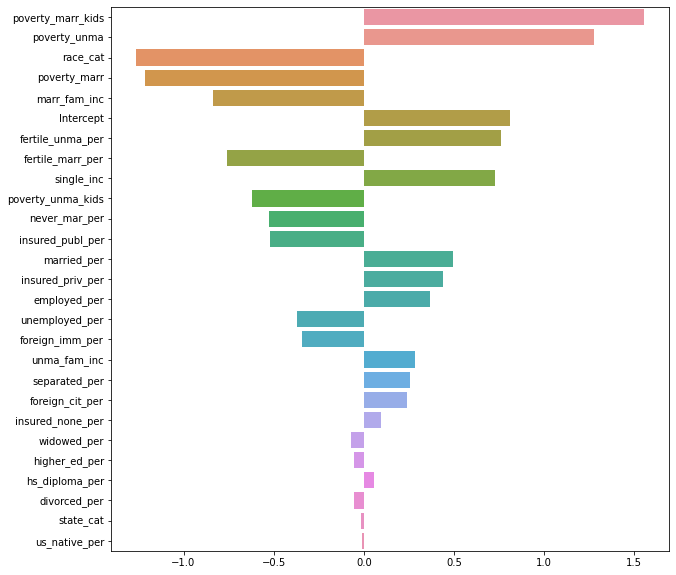

In [ ]:
# Tornado diagram showing the effect of each variable within the model
coeff = model.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]

fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=coeff.values, y=coeff.index, orient='h', ax=ax);

#### Model Refinement

In a bid to optimize our regression model, we decided to select the most important features to remove noise in our data. Two methods were used to identify the most important features, coefficient weight and Sequential Feature Selection

##### Identifying feature importance from regression coefficients

In [ ]:
Y = df2['age_adj_rate']
X = df2.drop('age_adj_rate', axis=1)

mod = LinearRegression()
mod.fit(X,Y)

LinearRegression()

In [ ]:
coef = pd.concat([pd.Series(X.columns), pd.Series(mod.coef_)], axis=1)
coef.columns=["variable", "coefficient"]
coef.coefficient = coef.coefficient.apply(np.abs)
coef = coef.sort_values(by='coefficient')
coef

,variable,coefficient
18,us_native_per,0.010280
0,state_cat,0.013513
11,divorced_per,0.056637
14,hs_diploma_per,0.057103
15,higher_ed_per,0.057103
10,widowed_per,0.071208
25,insured_none_per,0.094800
19,foreign_cit_per,0.241517
12,separated_per,0.254149
4,unma_fam_inc,0.284052


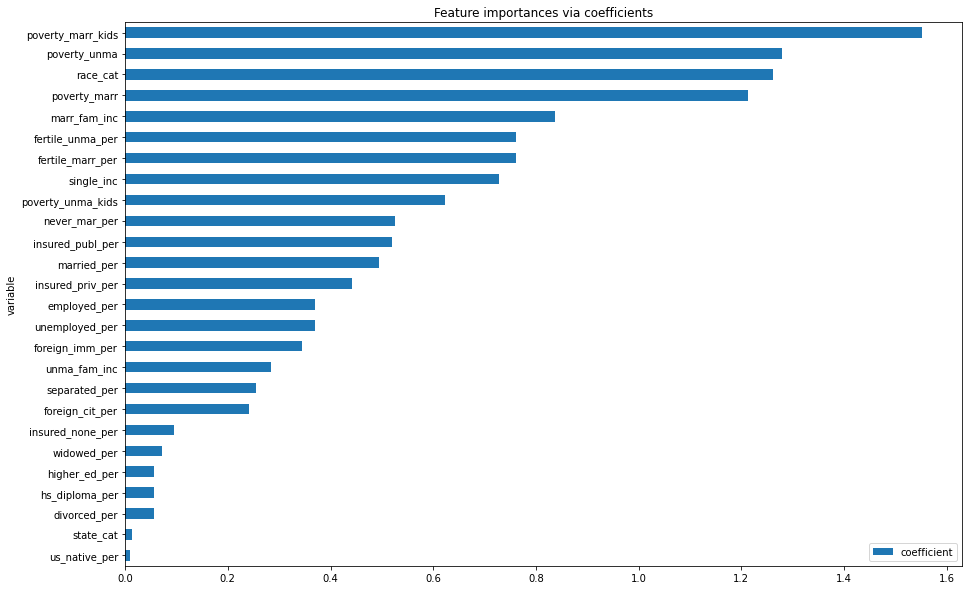

In [ ]:
coef.plot(kind='barh', x='variable', y='coefficient', figsize=(15, 10))
plt.title("Feature importances via coefficients")
plt.show()

##### Identifying feature importance using SFS

In [ ]:
sfs = SFS(mod,
         k_features='best',
         forward=True,
         floating=False,
         scoring='r2',
         cv=25)

sfs = sfs.fit(X,Y)

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict(confidence_interval=0.95)).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)","[-0.7206647662772789, 0.7234551481809689, 0.38...",0.250088,"(poverty_unma,)",0.22009,0.523522,0.106864
2,"(7, 12)","[-0.9550720222095124, 0.6565086671140956, 0.65...",0.355796,"(poverty_unma, separated_per)",0.191458,0.455418,0.092962
3,"(7, 12, 18)","[-0.6348210897892592, 0.7542897020217713, 0.68...",0.487929,"(poverty_unma, separated_per, us_native_per)",0.190458,0.453039,0.092476
4,"(7, 12, 18, 21)","[0.03684610109929076, 0.830117910494716, 0.758...",0.525471,"(poverty_unma, separated_per, us_native_per, e...",0.161384,0.38388,0.078359
5,"(1, 7, 12, 18, 21)","[0.2359831189645576, 0.9147635110826887, 0.468...",0.610058,"(race_cat, poverty_unma, separated_per, us_nat...",0.109709,0.260963,0.053269
6,"(0, 1, 7, 12, 18, 21)","[0.08895346903144552, 0.9395487866587422, 0.48...",0.62491,"(state_cat, race_cat, poverty_unma, separated_...",0.10935,0.260109,0.053095
7,"(0, 1, 7, 12, 18, 21, 22)","[0.0889534690314453, 0.9395487866587426, 0.485...",0.62491,"(state_cat, race_cat, poverty_unma, separated_...",0.10935,0.260109,0.053095
8,"(0, 1, 7, 12, 13, 18, 21, 22)","[0.11015455114871497, 0.9414024935027311, 0.44...",0.623932,"(state_cat, race_cat, poverty_unma, separated_...",0.10904,0.25937,0.052944
9,"(0, 1, 7, 12, 13, 18, 21, 22, 23)","[0.16127231571421174, 0.9437488757300706, 0.44...",0.621803,"(state_cat, race_cat, poverty_unma, separated_...",0.106608,0.253585,0.051763
10,"(0, 1, 7, 11, 12, 13, 18, 21, 22, 23)","[0.3306070816522021, 0.9609682626009831, 0.435...",0.620936,"(state_cat, race_cat, poverty_unma, divorced_p...",0.132037,0.314073,0.06411


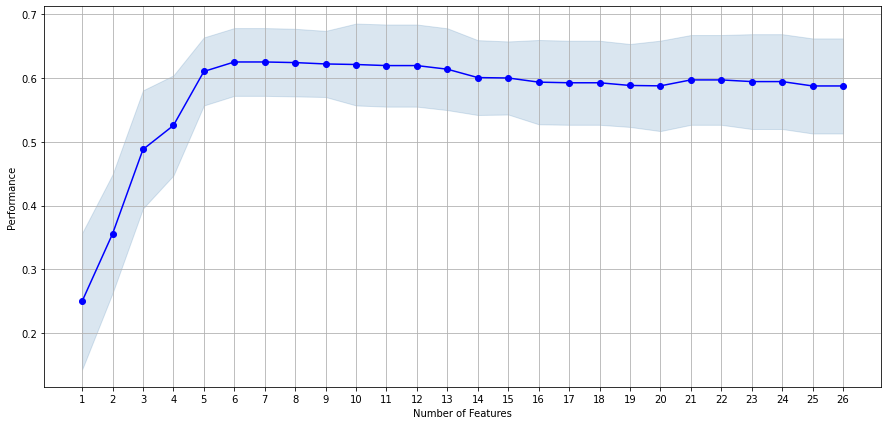

In [ ]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
fig.set_figwidth(15)
fig.set_figheight(7)
plt.grid()
plt.show()

In [ ]:
sfs.subsets_[10].get('feature_names')

('state_cat',
 'race_cat',
 'poverty_unma',
 'divorced_per',
 'separated_per',
 'never_mar_per',
 'us_native_per',
 'employed_per',
 'unemployed_per',
 'insured_priv_per')

In [ ]:
# considering only 10 most important features for model optimization 
formula = 'age_adj_rate ~ state_cat + race_cat + poverty_unma + ' \
          'divorced_per + separated_per + never_mar_per + ' \
          'us_native_per + employed_per + unemployed_per + insured_priv_per'

model_opt = smf.ols(formula, data=df2).fit()
print(model_opt.summary())

                            OLS Regression Results                            
Dep. Variable:           age_adj_rate   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     55.17
Date:                Tue, 24 Jan 2023   Prob (F-statistic):           1.37e-42
Time:                        05:43:39   Log-Likelihood:                -112.76
No. Observations:                 156   AIC:                             245.5
Df Residuals:                     146   BIC:                             276.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.2062      0.295  

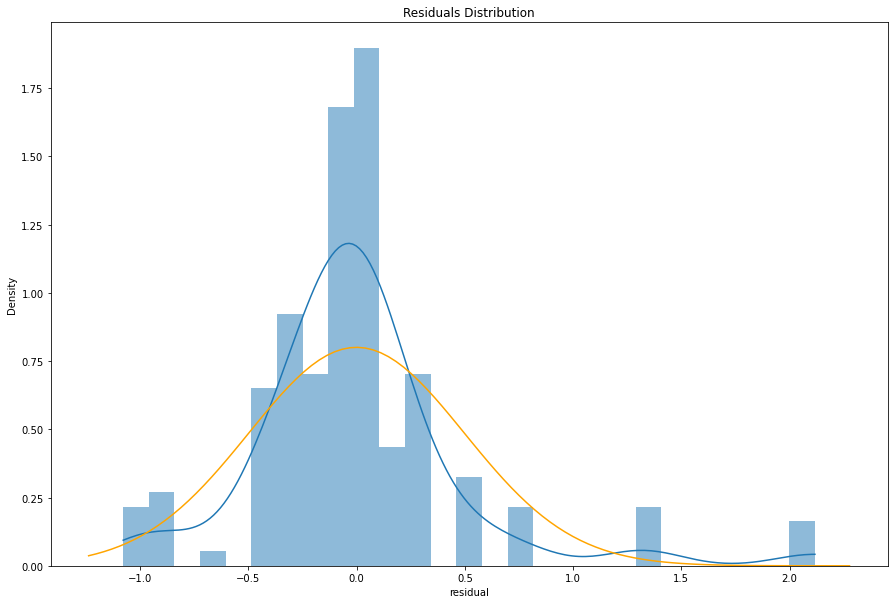

In [ ]:
avg, std = stats.norm.fit(model_opt.resid)

# plotting the residual
fig, ax = plt.subplots(figsize=(15,10))

# plot the residuals
sns.histplot(x=model_opt.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Residuals Distribution", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, avg, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

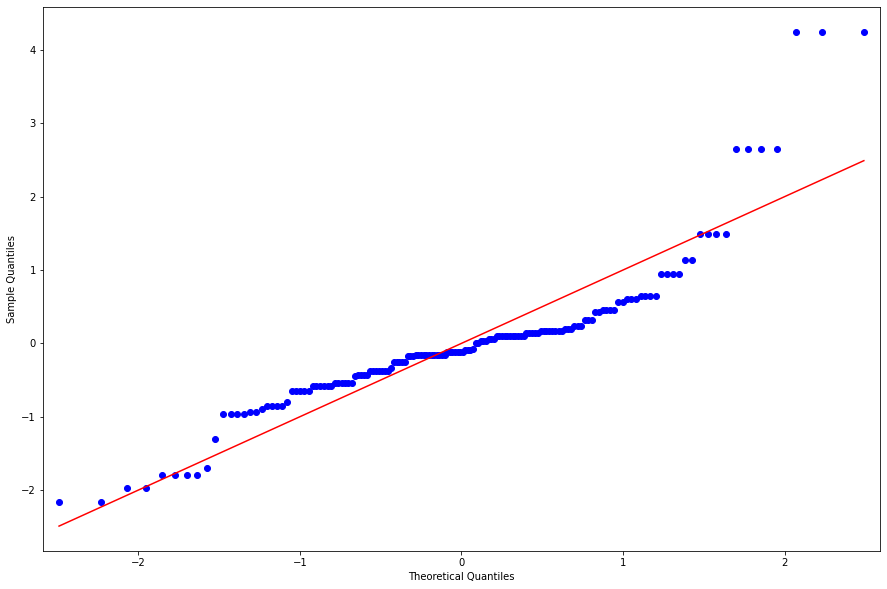

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sm.qqplot(model_opt.resid, line='s', fit=True, ax=ax)
plt.show()

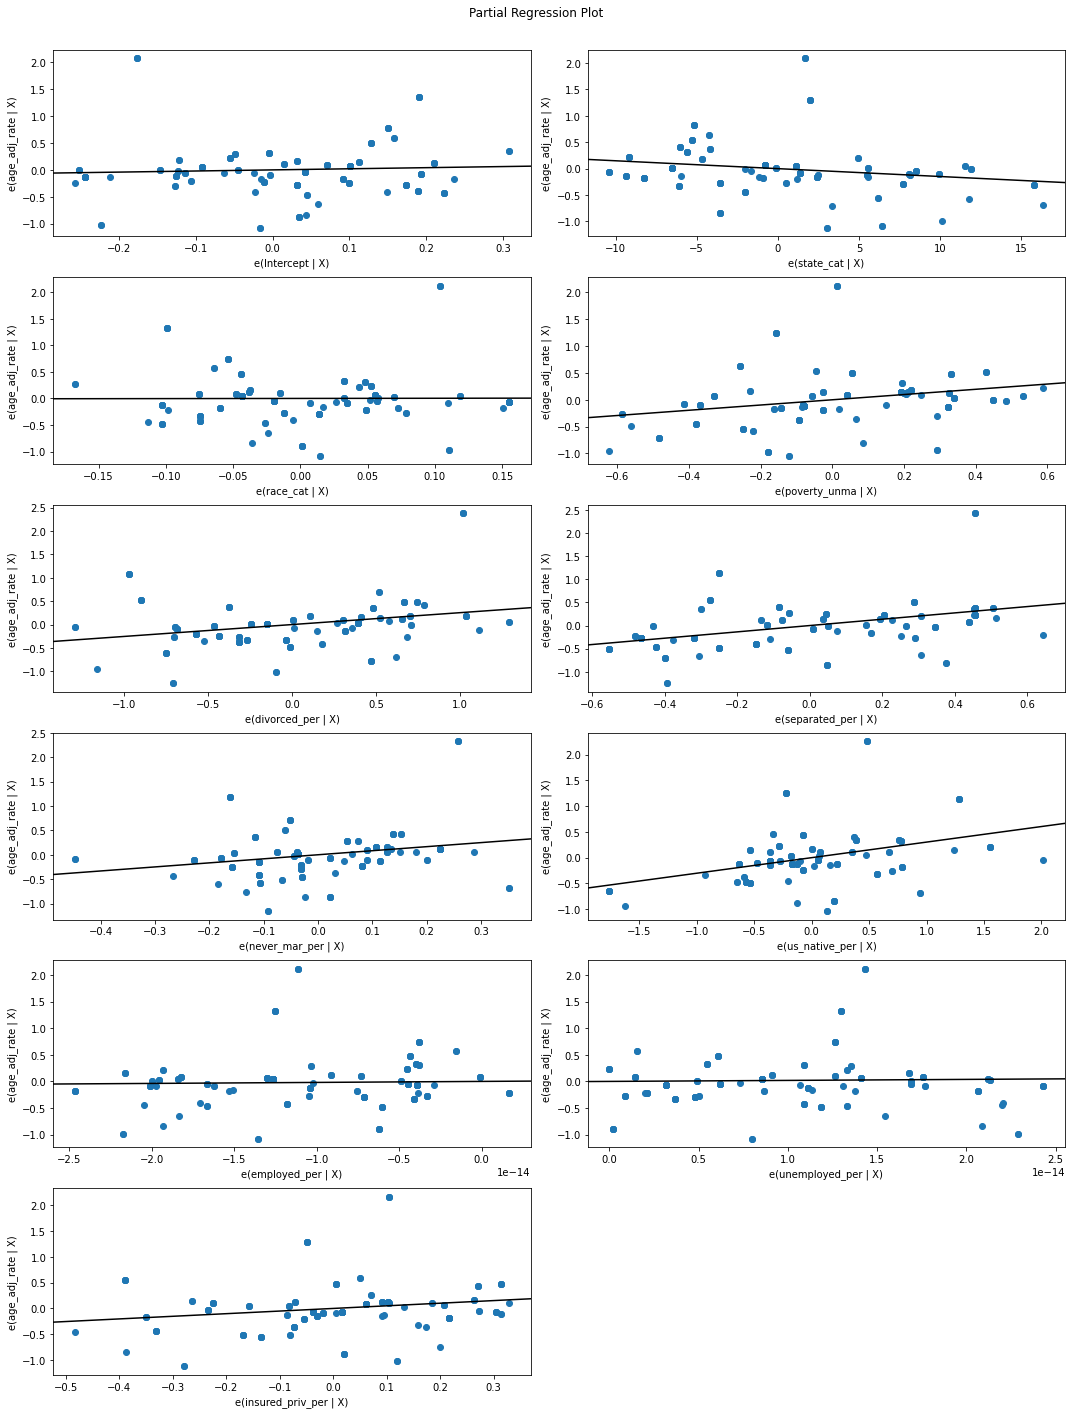

In [ ]:
# partial regression plot
fig = plt.figure(figsize=(15,20))
sm.graphics.plot_partregress_grid(model_opt, fig=fig)
plt.show()

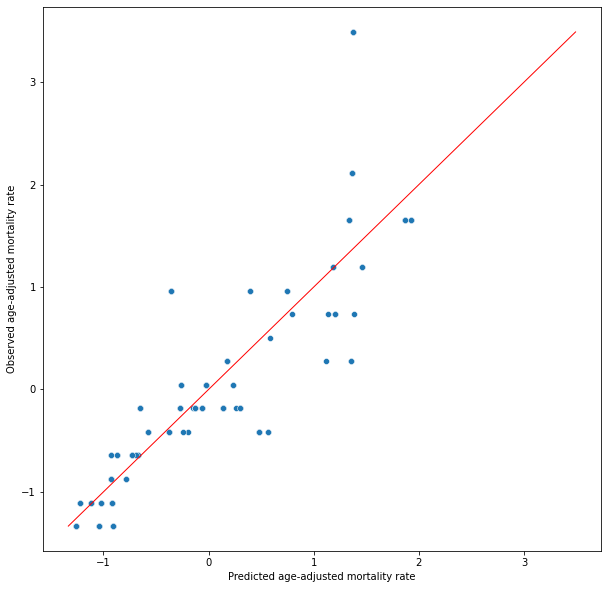

In [ ]:
Y = df2.age_adj_rate
Y_max = df2.age_adj_rate.max()
Y_min = df2.age_adj_rate.min()

fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = model_opt.fittedvalues, y=Y, ax=ax)
ax.set_xlabel("Predicted age-adjusted mortality rate")
ax.set_ylabel("Observed age-adjusted mortality rate")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

**Insights:**<br />
The stepwise optimization did not improve our model, so we decided to apply the full regression model to the next step.

### Regression, by race

In [ ]:
# full regresion on Black American subset
grp1 = df2[df2['race_cat'] == 0]

formula = 'age_adj_rate ~ state_cat + single_inc + marr_fam_inc + unma_fam_inc +' \
           'poverty_marr + poverty_marr_kids + poverty_unma + poverty_unma_kids + married_per + ' \
           'widowed_per + divorced_per + separated_per + never_mar_per + hs_diploma_per + higher_ed_per +' \
           'fertile_marr_per + fertile_unma_per + us_native_per + foreign_cit_per + foreign_imm_per +' \
           'employed_per + unemployed_per + insured_priv_per + insured_publ_per + insured_none_per'

model_grp1 = smf.ols(formula, data=grp1).fit()
print(model_grp1.summary())

                            OLS Regression Results                            
Dep. Variable:           age_adj_rate   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     19.54
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           6.12e-18
Time:                        22:16:10   Log-Likelihood:                -27.535
No. Observations:                  75   AIC:                             95.07
Df Residuals:                      55   BIC:                             141.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.4724      0.91

In [ ]:
# full regresion on White subset
grp2 = df2[df2['race_cat'] == 1]

formula = 'age_adj_rate ~ state_cat + single_inc + marr_fam_inc + unma_fam_inc +' \
           'poverty_marr + poverty_marr_kids + poverty_unma + poverty_unma_kids + married_per + ' \
           'widowed_per + divorced_per + separated_per + never_mar_per + hs_diploma_per + higher_ed_per +' \
           'fertile_marr_per + fertile_unma_per + us_native_per + foreign_cit_per + foreign_imm_per +' \
           'employed_per + unemployed_per + insured_priv_per + insured_publ_per + insured_none_per'

model_grp2 = smf.ols(formula, data=grp2).fit()
print(model_grp2.summary())

                            OLS Regression Results                            
Dep. Variable:           age_adj_rate   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           8.79e-43
Time:                        22:16:14   Log-Likelihood:                 106.05
No. Observations:                  81   AIC:                            -172.1
Df Residuals:                      61   BIC:                            -124.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.0508      0.28

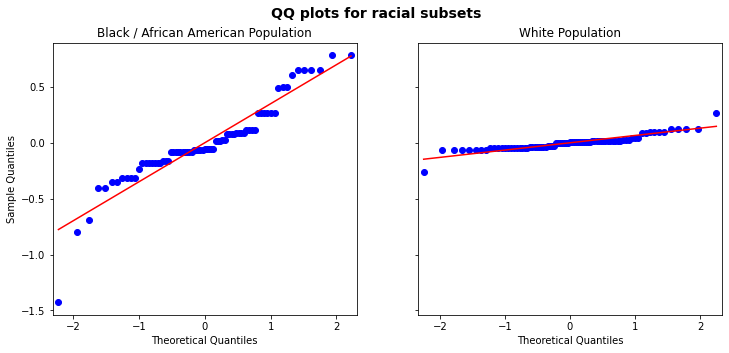

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sm.qqplot(model_grp1.resid, line='s', ax=axs[0])
sm.qqplot(model_grp2.resid, line='s', ax=axs[1])
axs[0].set_title('Black / African American Population')
axs[1].set_title('White Population')
axs[1].set_ylabel('')
fig.suptitle('QQ plots for racial subsets', fontsize=14, fontweight='bold');

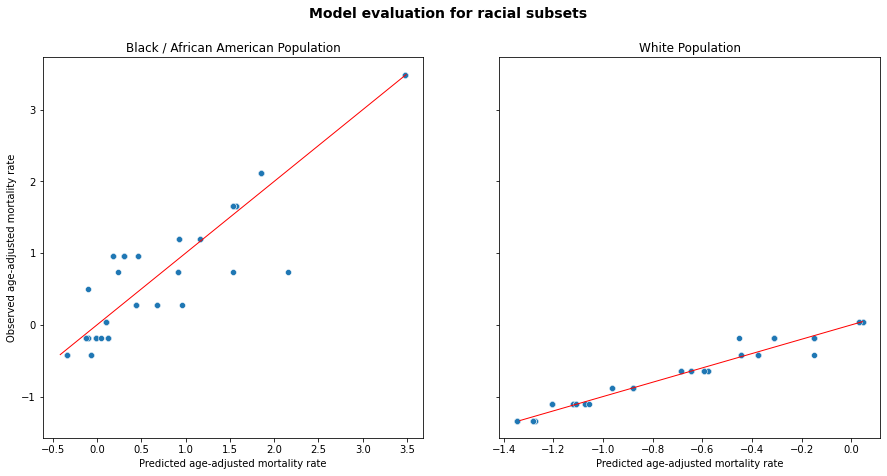

In [ ]:
y_grp1 = grp1['age_adj_rate']
y_grp2 = grp2['age_adj_rate']

y_max_grp1 = y_grp1.max()
y_min_grp1 = y_grp1.min()

y_max_grp2 = y_grp2.max()
y_min_grp2 = y_grp2.min()


fig, axs = plt.subplots(1, 2, figsize=(15,7), sharey=True)
sns.scatterplot(x = model_grp1.fittedvalues, y=y_grp1, ax=axs[0])
sns.scatterplot(x = model_grp2.fittedvalues, y=y_grp2, ax=axs[1])

axs[0].set_xlabel("Predicted age-adjusted mortality rate")
axs[1].set_xlabel("Predicted age-adjusted mortality rate")
axs[0].set_ylabel("Observed age-adjusted mortality rate")

X_ref_1 = Y_ref_1 = np.linspace(y_min_grp1, y_max_grp1, 100)
X_ref_2 = Y_ref_2 = np.linspace(y_min_grp2, y_max_grp2, 100)

axs[0].plot(X_ref_1, Y_ref_1, color='red', linewidth=1)
axs[1].plot(X_ref_2, Y_ref_2, color='red', linewidth=1)

axs[0].set_title('Black / African American Population')
axs[1].set_title('White Population')

fig.suptitle('Model evaluation for racial subsets', fontsize=14, fontweight='bold')
plt.show()

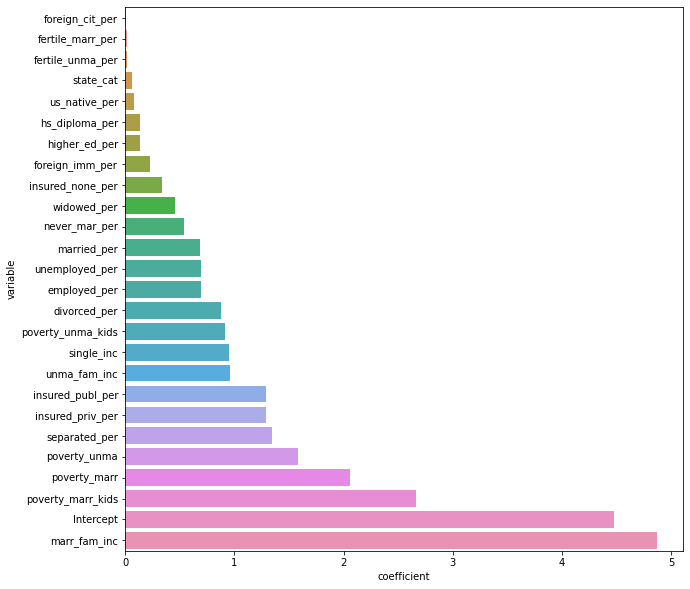

In [ ]:
coef_grp1 = pd.DataFrame(model_grp1.params).reset_index()
coef_grp1.columns=["variable", "coefficient"]
coef_grp1.coefficient = coef_grp1.coefficient.apply(np.abs)
coef_grp1 = coef_grp1.sort_values(by='coefficient')
#coef_grp1
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=coef_grp1.coefficient, y=coef_grp1.variable, orient='h', ax=ax);

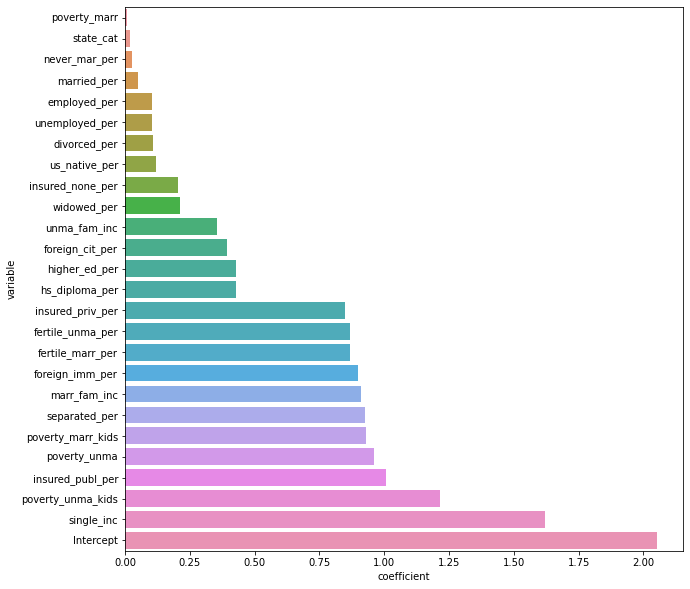

In [ ]:
coef_grp2 = pd.DataFrame(model_grp2.params).reset_index()
coef_grp2.columns=["variable", "coefficient"]
coef_grp2.coefficient = coef_grp2.coefficient.apply(np.abs)
coef_grp2 = coef_grp2.sort_values(by='coefficient')
#coef_grp1
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=coef_grp2.coefficient, y=coef_grp2.variable, orient='h', ax=ax);